In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc,classification_report
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE



In [4]:
# Load the dataset
data = pd.read_csv("updated_data.csv")

In [5]:
# Encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    
data.drop('CLIENTNUM', axis=1, inplace=True)
data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)
data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

# Display the remaining columns
print(data.columns)

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [6]:
# Define features and target
X = data.drop(columns=['Attrition_Flag'])
y = data['Attrition_Flag']


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [39]:
# Handle imbalance with SMOTE (Synthetic Minority Oversampling Technique).
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [41]:
#Train a Naive Bayes classifier
model = GaussianNB()
model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = model.predict(X_test)


In [43]:
# Check accuracy score
accuracy_gnb = accuracy_score(y_test, y_pred)
print(f"GaussianNB Accuracy: {accuracy_gnb}")

GaussianNB Accuracy: 0.7768562401263823


In [63]:
# Confusion matrix with cross-validation
y_pred_cv = cross_val_predict(model, X, y, cv=58)
conf_matrix = confusion_matrix(y, y_pred_cv)
print("Confusion Matrix (GaussianNB with cross-validation):")
print(conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix (GaussianNB with cross-validation):
[[1016  611]
 [ 491 8009]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.75      0.52       407
           1       0.94      0.78      0.85      2125

    accuracy                           0.78      2532
   macro avg       0.67      0.76      0.69      2532
weighted avg       0.85      0.78      0.80      2532



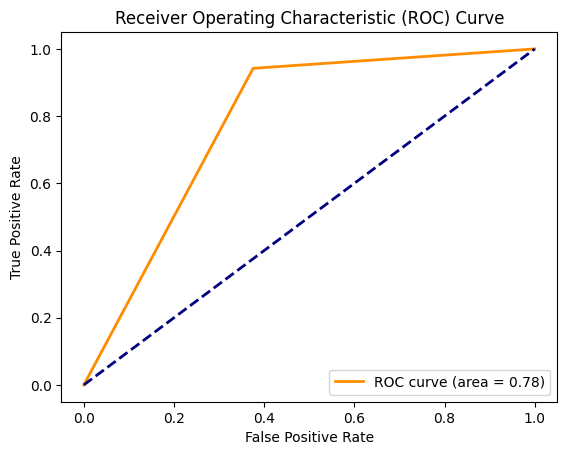

In [65]:
# ROC curve
fpr, tpr, _ = roc_curve(y, y_pred_cv)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [67]:
# Interpretation based on AUC value
if roc_auc == 1.0:
    interpretation = "The model achieves perfect classification with no errors."
elif roc_auc > 0.8:
    interpretation = "The model effectively distinguishes between classes with high accuracy."
elif 0.7 <= roc_auc <= 0.8:
    interpretation = "The model shows a reasonable ability to separate the classes."
elif 0.6 <= roc_auc < 0.7:
    interpretation = "The model has limited discriminative power and may require improvement."
elif 0.5 <= roc_auc < 0.6:
    interpretation = "The model struggles to differentiate between classes, similar to random guessing."
else:
    interpretation = "The model is no better than random guessing and requires significant improvement."

print(f"AUC: {roc_auc:.2f} - {interpretation}")

AUC: 0.78 - The model shows a reasonable ability to separate the classes.
